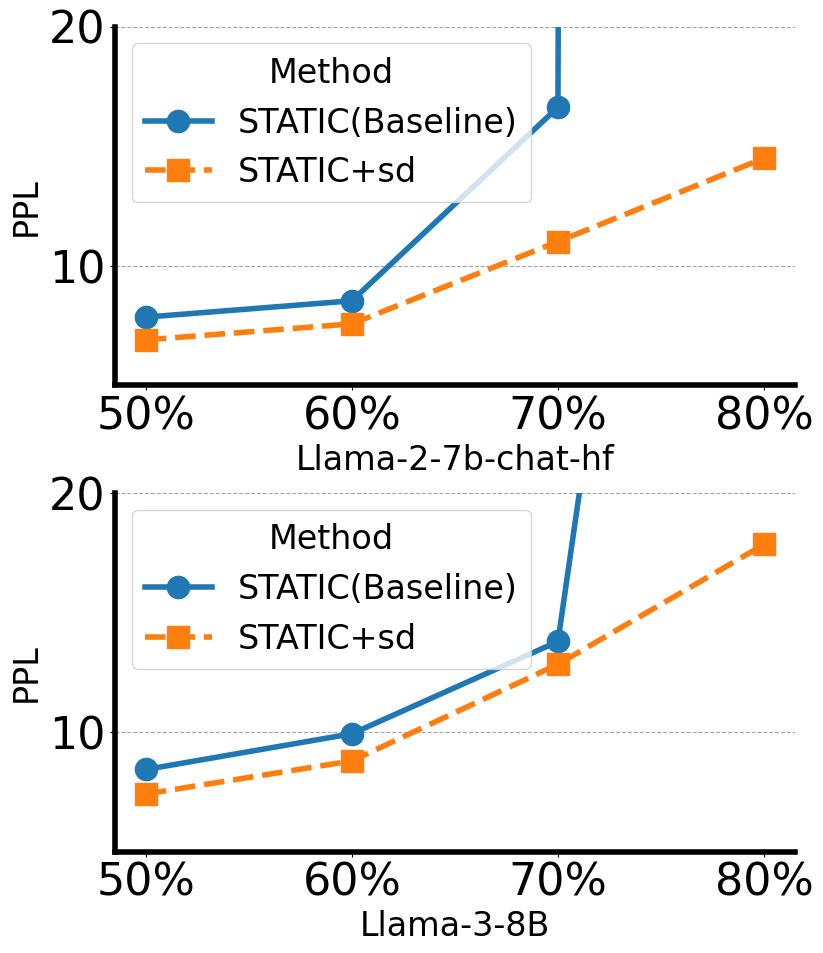

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

# 数据定义
sparsity_levels = [50, 60, 70, 80]  # 稀疏度

# Llama-2 数据（上半部分）
ppl_data_llama2 = {
    'STATIC(Baseline)': [7.8552, 8.5394, 16.632, 2620.6383],
    'STATIC+sd': [6.9055, 7.5746, 11.0136, 14.5048],
}

# Llama-3 数据（下半部分）
ppl_data_llama3 = {
    'STATIC(Baseline)': [8.439, 9.933, 13.792, 73.539],
    'STATIC+sd': [7.416, 8.798, 12.839, 17.85],
}

# 定义颜色、线型和 marker（顺序匹配不同方法）
colors = [
    "#1f77b4",  # 蓝色
    "#ff7f0e",  # 橙色
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf"
]
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']

# 调整全局参数（大字号和粗线设置）
plt.rcParams.update({
    'font.size': 80,            # 全局字体大小
    'axes.labelsize': 24,       # 坐标轴标签字体大小
    'axes.titlesize': 32,       # 标题字体大小
    'legend.fontsize': 28,      # 图例字体大小
    'xtick.labelsize': 32,      # x 轴刻度字体大小
    'ytick.labelsize': 32,      # y 轴刻度字体大小
    'lines.linewidth': 4.0,     # 全局线条粗细
    'axes.linewidth': 4.0       # 坐标轴边框线粗细
})
plt.rcParams["pdf.fonttype"] = 42   # PDF 输出时嵌入矢量字体

# 创建包含两个子图的图形，采用上下排列（这里设置 figsize 可根据需要调整）
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

def plot_data(ax, ppl_data, xlabel, ylim=(5, 20)):
    """
    在给定的轴 ax 上绘制 ppl_data，对应的 x 轴数据是 sparsity_levels，
    并设置 x 轴、y 轴标签、刻度和网格线等。
    """
    # 绘制每种方法的曲线
    for i, (method, values) in enumerate(ppl_data.items()):
        # 过滤 None 值
        x = [sparsity_levels[j] for j, v in enumerate(values) if v is not None]
        y = [v for v in values if v is not None]
        color = colors[i % len(colors)]
        linestyle = linestyles[i % len(linestyles)]
        marker = markers[i % len(markers)]
        ax.plot(x, y, label=method, color=color, linestyle=linestyle, marker=marker, markersize=16)

    # 设置坐标轴标签和范围
    ax.set_xlabel(xlabel, fontsize=24)
    ax.set_ylabel("PPL", fontsize=24)
    ax.set_ylim(ylim)
    
    # 设置 x 轴刻度与标签
    ax.set_xticks([50, 60, 70, 80])
    ax.set_xticklabels(['50%', '60%', '70%', '80%'])
    ax.xaxis.set_major_locator(ticker.FixedLocator([50, 60, 70, 80]))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.tick_params(axis='both', which='major')
    
    # 添加 y 轴网格线
    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)
    
    # 去除顶部与右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 添加图例
    ax.legend(title="Method", title_fontsize=24, fontsize=24, loc='upper left')
    
# 绘制上面的图：Llama-2
# 注意：由于 Llama-2 中数据跨度较大（例如 2620），你可能需要单独设置 ylim，否则图中数据分布会很不均衡
plot_data(ax1, ppl_data_llama2, "Llama-2-7b-chat-hf", ylim=(5, 20))

# 绘制下面的图：Llama-3
plot_data(ax2, ppl_data_llama3, "Llama-3-8B", ylim=(5, 20))

# 调整整体布局，确保两幅图不重叠
plt.tight_layout()
plt.subplots_adjust(top=0.925, bottom=0.10, left=0.10, right=0.95, hspace=0.30)

# 保存图像，使用 bbox_inches='tight' 确保内容完整
current_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
plt.savefig(f'{current_date}-Llama-2-3_Sparsity_scale_composite.pdf', dpi=1000, bbox_inches='tight')
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from common import get_filename
 
 
X0 = [10, 20, 30, 40, 50]
Y0 = [0.64, 0.64, 0.64, 0.64, 0.64]
Y0 = np.array(Y0) * 100.0
 
X1 = X0
Y1 = [0.77, 0.75, 0.74, 0.73, 0.73]
Y1 = np.array(Y1) * 100.0
 
fig, ax = plt.subplots(figsize=(5, 4))
 
def plot_line(xarr, yarr, marker, label):
    line00, = ax.plot(xarr, yarr, linewidth=3.0, marker=marker, markersize=10, label=label)
    #for x, y in zip(xarr, yarr):
    #    ax.annotate('{:.1f}'.format(y), (x, y), textcoords='offset points', xytext=(0, 5), ha='center', size=14)
 
plot_line(X1, Y1, 'o', 'Context Level')
plot_line(X0, Y0, 'v', 'Task Level')
 
plt.xlim(10, 50)
plt.ylim(60, 80)
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Token Length', size=16)
ax.set_ylabel('Hit Rate (%)', size=16)
 
#ax.grid(True)
 
ax.legend(loc='upper right', fontsize=14)
#ax.legend(bbox_to_anchor=(0.55, 0.625), loc='lower center', fontsize=14)
 
plt.rcParams["pdf.fonttype"] = 42
plt.subplots_adjust(top=0.925, bottom=0.20, left=0.20, right=0.85, hspace=0.01, wspace=0.01)
 
#plt.show()
 
filename = get_filename(__file__)
plt.savefig(filename + ".png")
plt.savefig(filename + ".pdf")
#plt.clf()
print(f"saved {filename}")

ModuleNotFoundError: No module named 'common'

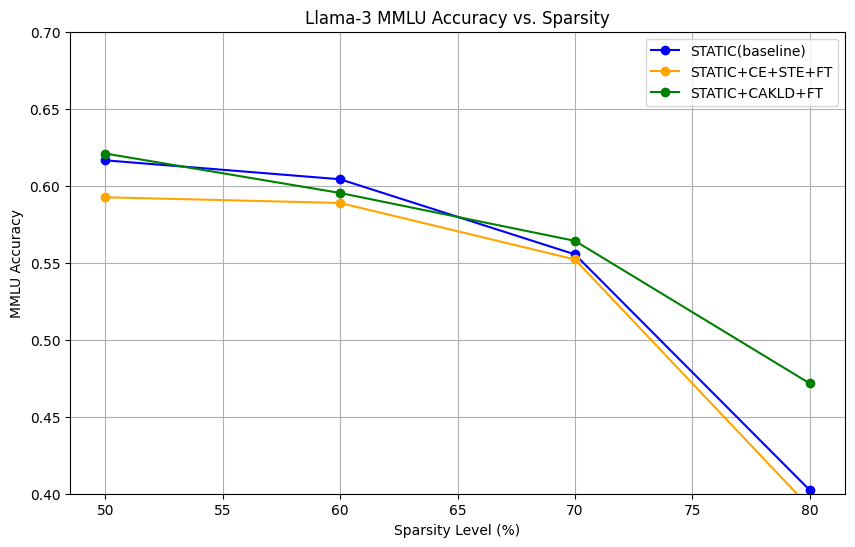

In [25]:
mmlu_data = {
    "STATIC(baseline)": [0.6165, 0.6042, 0.5554, 0.4023],
    "STATIC+CE+STE+FT": [0.5925, 0.5888, 0.5521, 0.3911],
    "STATIC+CAKLD+FT": [ 0.6209, 0.5953, 0.5642, 0.4716]
}

# 自定义颜色顺序
colors = ["blue", "orange", "green", "red", "purple"]

import matplotlib.pyplot as plt

# 稀疏度
sparsity_levels = [50, 60, 70, 80]  # 包括 0% 稀疏度

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制每种方法的折线图
for (method, values), color in zip(mmlu_data.items(), colors):
    x = [sparsity_levels[i] for i, v in enumerate(values) if v is not None]  # 包括稀疏度为 0 的点
    y = [v for v in values if v is not None]  # 包括稀疏度为 0 的值
    plt.plot(x, y, marker='o', label=method, color=color)

# 添加标题和标签
plt.xlabel("Sparsity Level (%)")
plt.ylabel("MMLU Accuracy")

# 设置y轴范围
plt.ylim(0.4, 0.7)  # 根据数据调整范围

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 设置标题
title = "Llama-3 MMLU Accuracy vs. Sparsity"
plt.title(title)

# 保存图像
plt.savefig(f"{title}.png")

# 显示图形
plt.show()